<a href="https://colab.research.google.com/github/yashshroff99/College-Projects/blob/main/Copy_of_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Versa Sales Data

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
FILE_LOC = '/gdrive/My Drive/'

In [ ]:
# link = 'https://drive.google.com/file/d/1SmBUwCtrd7TRTPfOORLzCEy5zndYNpnW/view?usp=sharing'

In [ ]:
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [ ]:
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Filename.csv')
# df3 = pd.read_csv('Filename.csv')
# # Dataset is now stored in a Pandas Dataframe

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
#read data
versa_sales = pd.read_csv(FILE_LOC+'data_updated22-09.csv', parse_dates=[4], index_col=0, squeeze=True, date_parser=parser)

In [ ]:
versa_sales

,inventory_transaction_id,inventory_item_id,delta,transaction_date,created_at,updated_at,id-2,part_id,internal_organization_id,firm_id,created_at-2,updated_at-2,measurement_unit_id,lot_id,container_id,facility_id,serial_number,shipment_receipt_id,type,order_shipment_id,bill_item_id
id,,,,,,,,,,,,,,,,,,,,,
2751,2754,34,-4.0,2013-01-28 00:00:00,2018-04-01 04:47:22.490212,2018-04-01 04:47:22.490212,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
2752,2755,34,-4.0,2013-01-28 00:00:00,2018-04-01 04:47:22.504063,2018-04-01 04:47:22.504063,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
4507,4510,34,-2.0,2013-11-13 00:00:00,2018-04-01 04:48:03.58856,2018-04-01 04:48:03.58856,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
51183,48585,34,2.0,2011-07-01 00:00:00,2018-04-01 05:23:52.959061,2018-04-01 05:23:52.959061,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
52756,50158,34,4.0,2013-01-28 00:00:00,2018-04-01 05:24:26.567636,2018-04-01 05:24:26.567636,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255014,1205154,544394,37.0,2020-08-09 00:00:00,2020-08-09 21:28:03.915407,2020-08-09 21:28:03.915407,544394,959608,676,598,2020-08-10 02:58:03.13413+05:30,2020-08-10 02:58:03.13413+05:30,4962,NaN,NaN,1801,NaN,170568.0,Physical::FifoCostedInventoryItem,NaN,NaN
1255016,1205156,544394,-37.0,2020-08-09 00:00:00,2020-08-09 21:28:54.89723,2020-08-09 21:28:54.89723,544394,959608,676,598,2020-08-10 02:58:03.13413+05:30,2020-08-10 02:58:03.13413+05:30,4962,NaN,NaN,1801,NaN,170568.0,Physical::FifoCostedInventoryItem,NaN,NaN
1255015,1205155,544395,37.0,2020-08-09 00:00:00,2020-08-09 21:28:04.547556,2020-08-09 21:28:04.547556,544395,959607,676,598,2020-08-10 02:58:03.970674+05:30,2020-08-10 02:58:03.970674+05:30,4962,NaN,NaN,1801,NaN,170569.0,Physical::FifoCostedInventoryItem,NaN,NaN


In [ ]:
versa_salesf_568 = versa_sales[(versa_sales["firm_id"]==568) & (versa_sales["delta"]<0) ]#& (versa_sales["facility_id"]==165) ]

In [ ]:
versa_salesf_568

,inventory_transaction_id,inventory_item_id,delta,transaction_date,created_at,updated_at,id-2,part_id,internal_organization_id,firm_id,created_at-2,updated_at-2,measurement_unit_id,lot_id,container_id,facility_id,serial_number,shipment_receipt_id,type,order_shipment_id,bill_item_id
id,,,,,,,,,,,,,,,,,,,,,
302588,286851,153724,-1.0,2019-01-10 00:00:00,2019-01-13 04:20:29.028895,2019-01-13 04:20:29.028895,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
838688,806943,153724,-1.0,2019-10-12 00:00:00,2019-10-15 21:41:44.669476,2019-10-15 21:41:44.669476,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
965964,929515,153724,-1.0,2020-01-31 00:00:00,2020-01-31 21:15:22.586467,2020-01-31 21:15:22.586467,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
99018,93226,153725,-1.0,2017-03-16 00:00:00,2018-04-01 05:34:22.848555,2018-04-01 05:34:22.848555,153725,140074,644,568,2017-03-28 22:29:58.971172+05:30,2017-03-28 22:29:59.020915+05:30,4596,NaN,NaN,1602,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
104229,98437,153725,-1.0,2017-12-30 00:00:00,2018-04-01 05:35:11.52919,2018-04-01 05:35:11.52919,153725,140074,644,568,2017-03-28 22:29:58.971172+05:30,2017-03-28 22:29:59.020915+05:30,4596,NaN,NaN,1602,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252983,1203285,544131,-2.0,2020-08-06 00:00:00,2020-08-06 19:47:44.732212,2020-08-06 19:47:44.732212,544131,144988,644,568,2020-08-07 01:17:40.513329+05:30,2020-08-07 01:17:40.513329+05:30,4596,NaN,NaN,1626,NaN,NaN,Physical::FifoCostedInventoryItem,2123891.0,NaN
1252985,1203286,544132,-3.0,2020-08-06 00:00:00,2020-08-06 19:47:45.146989,2020-08-06 19:47:45.146989,544132,144990,644,568,2020-08-07 01:17:40.894345+05:30,2020-08-07 01:17:40.894345+05:30,4596,NaN,NaN,1626,NaN,NaN,Physical::FifoCostedInventoryItem,2123890.0,NaN
1252987,1203287,544133,-2.0,2020-08-06 00:00:00,2020-08-06 19:47:45.554271,2020-08-06 19:47:45.554271,544133,144986,644,568,2020-08-07 01:17:41.394193+05:30,2020-08-07 01:17:41.394193+05:30,4596,NaN,NaN,1626,NaN,NaN,Physical::FifoCostedInventoryItem,2123889.0,NaN


In [ ]:
versa_sales

,inventory_transaction_id,inventory_item_id,delta,transaction_date,created_at,updated_at,id-2,part_id,internal_organization_id,firm_id,created_at-2,updated_at-2,measurement_unit_id,lot_id,container_id,facility_id,serial_number,shipment_receipt_id,type,order_shipment_id,bill_item_id
id,,,,,,,,,,,,,,,,,,,,,
2751,2754,34,-4.0,2013-01-28 00:00:00,2018-04-01 04:47:22.490212,2018-04-01 04:47:22.490212,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
2752,2755,34,-4.0,2013-01-28 00:00:00,2018-04-01 04:47:22.504063,2018-04-01 04:47:22.504063,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
4507,4510,34,-2.0,2013-11-13 00:00:00,2018-04-01 04:48:03.58856,2018-04-01 04:48:03.58856,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
51183,48585,34,2.0,2011-07-01 00:00:00,2018-04-01 05:23:52.959061,2018-04-01 05:23:52.959061,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
52756,50158,34,4.0,2013-01-28 00:00:00,2018-04-01 05:24:26.567636,2018-04-01 05:24:26.567636,34,45,182,182,2011-07-08 01:33:50.402475+05:30,2013-12-21 02:02:48.080776+05:30,1358,NaN,NaN,165,NaN,NaN,Physical::AverageCostedInventoryItem,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255014,1205154,544394,37.0,2020-08-09 00:00:00,2020-08-09 21:28:03.915407,2020-08-09 21:28:03.915407,544394,959608,676,598,2020-08-10 02:58:03.13413+05:30,2020-08-10 02:58:03.13413+05:30,4962,NaN,NaN,1801,NaN,170568.0,Physical::FifoCostedInventoryItem,NaN,NaN
1255016,1205156,544394,-37.0,2020-08-09 00:00:00,2020-08-09 21:28:54.89723,2020-08-09 21:28:54.89723,544394,959608,676,598,2020-08-10 02:58:03.13413+05:30,2020-08-10 02:58:03.13413+05:30,4962,NaN,NaN,1801,NaN,170568.0,Physical::FifoCostedInventoryItem,NaN,NaN
1255015,1205155,544395,37.0,2020-08-09 00:00:00,2020-08-09 21:28:04.547556,2020-08-09 21:28:04.547556,544395,959607,676,598,2020-08-10 02:58:03.970674+05:30,2020-08-10 02:58:03.970674+05:30,4962,NaN,NaN,1801,NaN,170569.0,Physical::FifoCostedInventoryItem,NaN,NaN


In [ ]:
vsi_153724_f_1604 = versa_sales[(versa_sales["inventory_item_id"]==153724) & (versa_sales["facility_id"]==1604) & (versa_sales["delta"]<0)]

In [ ]:
vsi_153724_f_1604

,inventory_transaction_id,inventory_item_id,delta,transaction_date,created_at,updated_at,id-2,part_id,internal_organization_id,firm_id,created_at-2,updated_at-2,measurement_unit_id,lot_id,container_id,facility_id,serial_number,shipment_receipt_id,type,order_shipment_id,bill_item_id
id,,,,,,,,,,,,,,,,,,,,,
302588,286851,153724,-1.0,2019-01-10 00:00:00,2019-01-13 04:20:29.028895,2019-01-13 04:20:29.028895,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
838688,806943,153724,-1.0,2019-10-12 00:00:00,2019-10-15 21:41:44.669476,2019-10-15 21:41:44.669476,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN
965964,929515,153724,-1.0,2020-01-31 00:00:00,2020-01-31 21:15:22.586467,2020-01-31 21:15:22.586467,153724,140074,644,568,2017-03-28 22:29:58.526736+05:30,2017-07-07 00:48:02.864586+05:30,4596,NaN,NaN,1604,NaN,NaN,Physical::FifoCostedInventoryItem,NaN,NaN


In [ ]:
cols=[1,2,3,15]
versa_salesf_568=versa_salesf_568[versa_salesf_568.columns[cols]]
versa_salesf_568["delta"]=versa_salesf_568["delta"].abs()
versa_salesf_568

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,inventory_item_id,delta,transaction_date,facility_id
id,,,,
302588,153724,1.0,2019-01-10 00:00:00,1604
838688,153724,1.0,2019-10-12 00:00:00,1604
965964,153724,1.0,2020-01-31 00:00:00,1604
99018,153725,1.0,2017-03-16 00:00:00,1602
104229,153725,1.0,2017-12-30 00:00:00,1602
...,...,...,...,...
1252983,544131,2.0,2020-08-06 00:00:00,1626
1252985,544132,3.0,2020-08-06 00:00:00,1626
1252987,544133,2.0,2020-08-06 00:00:00,1626


In [ ]:
versa_salesf_568=versa_salesf_568.groupby(versa_salesf_568["transaction_date"], as_index=False).agg({'delta': np.sum})
versa_salesf_568["transaction_date"]

0      2016-11-11
1      2017-01-09
2      2017-03-07
3      2017-03-08
4      2017-03-09
          ...    
1172   2020-08-03
1173   2020-08-05
1174   2020-08-06
1175   2020-08-07
1176   2020-08-08
Name: transaction_date, Length: 1177, dtype: datetime64[ns]

In [ ]:
versa_fsalesf_568 = versa_salesf_568

delta<0 daily data points

In [ ]:
versa_fsalesf_568

,transaction_date,delta
0,2016-11-11,2.0
1,2017-01-09,1291.0
2,2017-03-07,3.0
3,2017-03-08,4.0
4,2017-03-09,19.0
...,...,...
1172,2020-08-03,8.0
1173,2020-08-05,122.0
1174,2020-08-06,32.0
1175,2020-08-07,78.0


In [ ]:
r = pd.date_range(start=versa_fsalesf_568.transaction_date.min(), end=versa_fsalesf_568.transaction_date.max())
versa_fsalesn=versa_fsalesf_568.set_index('transaction_date').reindex(r).fillna(0.0).rename_axis('transaction_date').reset_index()
#df.set_index('dt').reindex(r).fillna(0.0).rename_axis('dt').reset_index()

In [ ]:
versa_fsalesn

,transaction_date,delta
0,2016-11-11,2.0
1,2016-11-12,0.0
2,2016-11-13,0.0
3,2016-11-14,0.0
4,2016-11-15,0.0
...,...,...
1362,2020-08-04,0.0
1363,2020-08-05,122.0
1364,2020-08-06,32.0
1365,2020-08-07,78.0


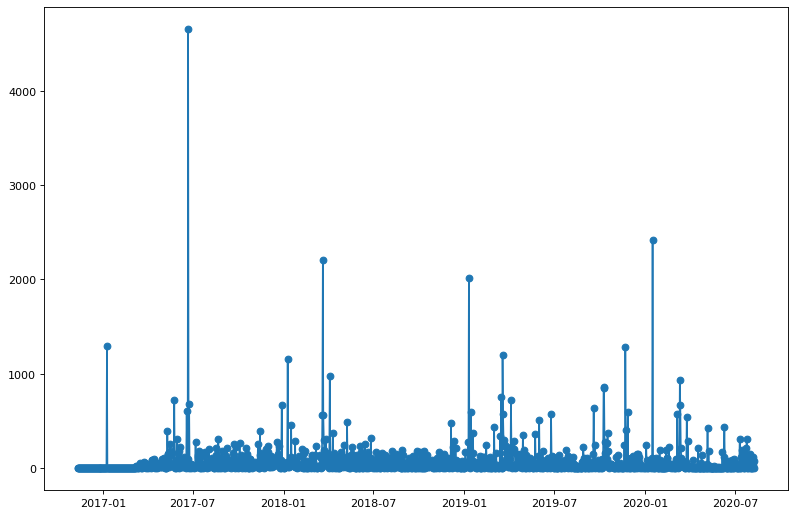

In [ ]:
import matplotlib
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
dates = matplotlib.dates.date2num(versa_fsalesn["transaction_date"])
plt.plot_date(dates, versa_fsalesn["delta"],linestyle='solid')


In [ ]:
versa_fsales_monthly = versa_fsalesn.groupby(versa_fsalesn.transaction_date.dt.to_period("M")).agg({'delta': np.sum})

In [ ]:
versa_fsales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 46 entries, 2016-11 to 2020-08
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delta   46 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


In [ ]:
versa_fsales_monthly["date"]=versa_fsales_monthly.index
versa_fsales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 46 entries, 2016-11 to 2020-08
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   delta   46 non-null     float64  
 1   date    46 non-null     period[M]
dtypes: float64(1), period[M](1)
memory usage: 1.1 KB


In [ ]:
versa_fsales_monthly

,delta,date
transaction_date,,
2016-11,2.0,2016-11
2016-12,0.0,2016-12
2017-01,1291.0,2017-01
2017-02,0.0,2017-02
2017-03,511.0,2017-03
2017-04,947.0,2017-04
2017-05,3418.0,2017-05
2017-06,7562.0,2017-06
2017-07,1796.0,2017-07


In [ ]:
versa_fsales_monthly2=versa_fsales_monthly.reset_index(inplace = True)

In [ ]:
versa_fsales_monthly=versa_fsales_monthly.drop('date',axis=1)

In [ ]:
versa_fsales_monthly

,transaction_date,delta
0,2016-11,2.0
1,2016-12,0.0
2,2017-01,1291.0
3,2017-02,0.0
4,2017-03,511.0
5,2017-04,947.0
6,2017-05,3418.0
7,2017-06,7562.0
8,2017-07,1796.0
9,2017-08,2171.0


In [ ]:
versa_fsales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   transaction_date  46 non-null     period[M]
 1   delta             46 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 864.0 bytes


In [ ]:
versa_fsales_monthly.transaction_date = versa_fsales_monthly.transaction_date.map(str)

In [ ]:
versa_fsales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  46 non-null     object 
 1   delta             46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [ ]:
versa_fsales_monthly['transaction_date']=pd.to_datetime(versa_fsales_monthly['transaction_date'])

In [ ]:
versa_fsales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  46 non-null     datetime64[ns]
 1   delta             46 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 864.0 bytes


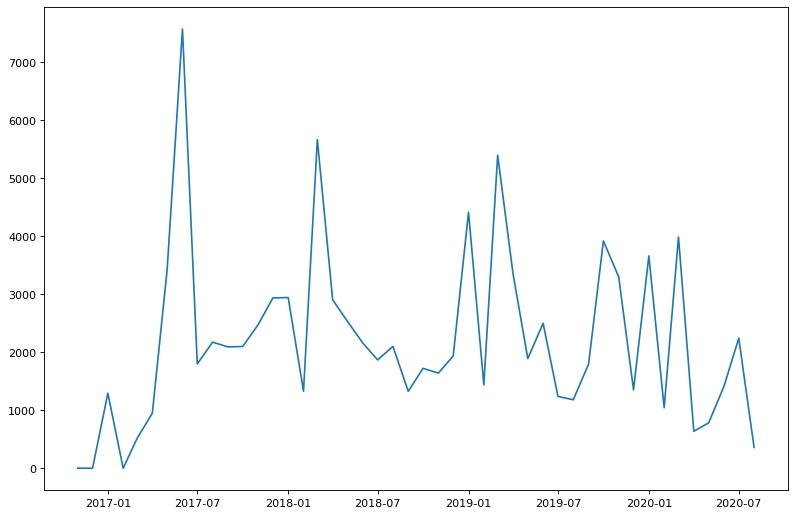

In [ ]:
plt.close()
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
#dates = matplotlib.dates.date2num(versa_fsales_monthly["transaction_date"])
#matplotlib.pyplot.plot(versa_fsales_monthly["date"].to_timestamp(), versa_fsales_monthly["delta"],linestyle='solid')

#versa_fsales_monthly.set_index('date', inplace=True)
#versa_fsales_monthly.index = pd.to_datetime(versa_fsales_monthly['date'])
plt.plot(versa_fsales_monthly['transaction_date'],versa_fsales_monthly['delta'])

# Get training and testing sets

In [ ]:
versa_fsales_monthly

,transaction_date,delta
0,2016-11-01,2.0
1,2016-12-01,0.0
2,2017-01-01,1291.0
3,2017-02-01,0.0
4,2017-03-01,511.0
5,2017-04-01,947.0
6,2017-05-01,3418.0
7,2017-06-01,7562.0
8,2017-07-01,1796.0
9,2017-08-01,2171.0


In [ ]:
versa_fsales_monthly.transaction_date = versa_fsales_monthly.transaction_date.map(str)

In [ ]:
# train_end = datetime(2013,11,1)
# test_end = datetime(2014,11,1)

# train_data = versa_sm[(versa_sm.index<'2014-05-01')]
# test_data = versa_sm[(versa_sm.index>='2014-05-01')]

In [ ]:
train_data = versa_fsales_monthly[0:24]
test_data = versa_fsales_monthly[24:36]

In [ ]:
#train_data=train_data.drop(labels='date', axis=1)
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  24 non-null     object 
 1   delta             24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 24 to 35
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  12 non-null     object 
 1   delta             12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
versa_fsales_monthly

,transaction_date,delta
0,2016-11-01 00:00:00,2.0
1,2016-12-01 00:00:00,0.0
2,2017-01-01 00:00:00,1291.0
3,2017-02-01 00:00:00,0.0
4,2017-03-01 00:00:00,511.0
5,2017-04-01 00:00:00,947.0
6,2017-05-01 00:00:00,3418.0
7,2017-06-01 00:00:00,7562.0
8,2017-07-01 00:00:00,1796.0
9,2017-08-01 00:00:00,2171.0


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
versa_fsales_monthly['transaction_date']= label_encoder.fit_transform(versa_fsales_monthly['transaction_date'])

versa_fsales_monthly['transaction_date'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
train_clean = versa_fsales_monthly.groupby(["delta","num"]).sum().reset_index()
train_clean = versa_fsales_monthly[["delta","transaction_date"]]
train_clean


KeyError: ignored

In [ ]:
train_data = train_clean[0:30]
test_data = train_clean[30:45]

In [ ]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = train_data["delta"]
# choose a number of time steps
n_steps = 14
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)


In [ ]:
X.shape


In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)
LSTM

In [ ]:
test_data.shape

In [ ]:
x_input=test_data["delta"].to_numpy()
x_input


In [ ]:
# demonstrate prediction for next 15 days
x_input=test_data["delta"].to_numpy()
temp_input=list(x_input)
lst_output=[]
i=0
while(i<15):

    if(len(temp_input)>3):
        x_input=array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)